In [ ]:
pip install vk_api

In [ ]:
pip install pymorphy2

In [1]:
from vk_api import VkApi
import vk_api
import re
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

from tensorflow.keras import utils 

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout 

from tensorflow.keras.preprocessing.text import Tokenizer 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
#from keras.utils import plot_model

In [ ]:
# with open('token.txt') as f:
#     token = f.readlines()[0]

In [ ]:
# def main(offset: int, token: str, group_id: str):
#     vk = vk_api.VkApi(token=token) # авторизация через токен (желательно)
#     api = vk.get_api()
#     posts = api.wall.get(owner_id = group_id, offset = offset, count=100)['items']
#     posts_strings = [post['text'] for post in posts]
#     num_like = []
#     comments_strings = []
#     for post in posts:
#         comments = api.wall.getComments(owner_id = group_id, post_id=post['id'], count=100)['items']
#         comments_strings.append([comment['text'] for comment in comments])
#         itemID = post['id']
#         isLiked = api.likes.getList(
#         type = 'post', 
#         owner_id = group_id, 
#         item_id = itemID               
#         )
#         num_like.append(isLiked['count'])
#     return posts_strings, comments_strings, num_like


In [ ]:
# combolist_posts = []
# combolist_comments = []
# combolist_like_count = []
# group_id = '-39895326'
# for i in range(0, 501, 100):
#     try:
#         rzd_posts, comments_strings_rzd, rzd_like_count = main( offset=i,token = token, group_id = group_id)
#         combolist_posts.extend(rzd_posts)
#         #print(combolist_posts)
#         combolist_comments.extend(comments_strings_rzd)
#         combolist_like_count.extend(rzd_like_count)
#     except:
#         print('Постов больше нет на смещении: ', i)


In [ ]:
# print(len(combolist_comments))

In [ ]:
# data = {'posts': combolist_posts, 'comments':combolist_comments,'count_likes': combolist_like_count}
# df=pd.DataFrame(data)
# df

In [ ]:
# df.to_excel("air_news.xlsx")

In [ ]:
# df_flagman=pd.read_excel ("flagman.xlsx")
# df_flot_moryak=pd.read_excel ("flot_moryak.xlsx")
# df_24_air_news=pd.read_excel ("24_air_news.xlsx")
# df_air_news=pd.read_excel ("air_news.xlsx")

In [ ]:
# df_air_water_transp = df_flagman.append(df_flot_moryak, ignore_index=True, sort=False)
# df_air_water_transp = df_air_water_transp.append(df_24_air_news, ignore_index=True, sort=False)
# df_air_water_transp = df_air_water_transp.append(df_air_news, ignore_index=True, sort=False)

In [ ]:
# df_air_water_transp

In [ ]:
# df_air_water_transp.to_excel("air_water_transp.xlsx")

In [2]:
df_air_water_transp=pd.read_excel ("air_water_transp.xlsx")

In [3]:
df_air_water_transp

,posts,comments,count_likes,category
0,⚡В ЗЕЛЕНОДОЛЬСКЕ СПУЩЕНО НА ВОДУ СПК «МИХАИЛ Д...,"['А Кама, опять в пролёте.', 'Рубка просто жес...",245,водный транспорт
1,"⚡НА ""КРАСНОМ СОРМОВЕ"" ЗАЛОЖИЛИ МЛАДШЕГО БРАТА ...",['Симпатичнее Карима!'],61,водный транспорт
2,⚡ГЛАВНЫЕ СУДОСТРОИТЕЛЬНЫЕ НОВОСТИ ЗА 27 АПРЕЛЯ...,[],38,водный транспорт
3,⚡СВЕЖИЕ КАДРЫ ИЗ ЯРОСЛАВСКОГО РЕЧНОГО ПОРТА\n\...,['Мрак'],46,водный транспорт
4,⚡ГРУЗОВАЯ ЛИНИЯ АРХАНГЕЛЬСК – ПЕВЕК ПРОДОЛЖИТ ...,[''],31,водный транспорт
...,...,...,...,...
2395,"Самолет ""Аэрофлота"", летевший в субботу из Мос...","['Почему? Что, португальцы начали бомбить Воро...",3,авиа транспорт
2396,NaN,"['На таком старом не страшно летать?', 'Все за...",46,авиа транспорт
2397,Boeing 777-200ER American Airlines - заход на ...,[],7,авиа транспорт
2398,"Семь лет назад был сбил пассажирский самолет ""...","['Щас начнётся...🤦\u200d♂️', 'уже суд идёт и п...",6,авиа транспорт


In [4]:
df_text = df_air_water_transp[['posts','category']]

# EDA

In [5]:
# Анализ пропусков
print(len(df_text))
df_text.isnull().sum()

2400


posts       179
category      0
dtype: int64

In [6]:
df_text = df_text.dropna()

In [7]:
#Дубликаты
duplicateRows = df_text[df_text.duplicated()]
duplicateRows.sort_values(by = 'posts')

,posts,category
719,2nd Engineer \nSalary: from 4000 $ / month \nJ...,водный транспорт
1083,Bloomberg сообщил о планах США пока не допуска...,водный транспорт
881,CV get - работа морякам. Мировые крюинги и суд...,водный транспорт
1020,CV get - работа морякам. Мировые крюинги и суд...,водный транспорт
940,CV get - работа морякам. Мировые крюинги и суд...,водный транспорт
1156,CV get - работа морякам. Мировые крюинги и суд...,водный транспорт
855,CV get - работа морякам. Мировые крюинги и суд...,водный транспорт
794,CV get - работа морякам. Мировые крюинги и суд...,водный транспорт
970,CV get - работа морякам. Мировые крюинги и суд...,водный транспорт
753,CV get - работа морякам. Мировые крюинги и суд...,водный транспорт


In [8]:
df_text.drop_duplicates(inplace=True)

In [9]:
print(len(df_text))

2193


In [10]:
# Анализ уникальности и дубликатов
pd.DataFrame(df_text['posts'].value_counts().values).value_counts()

1    2193
dtype: int64

In [11]:
# Приводм данные к строчному виду
df_text['posts'] = [x.lower() for x in df_text['posts']]
pd.DataFrame(df_text['posts'].value_counts().values).value_counts()

1    2193
dtype: int64

In [12]:
# Удаляем рабочие символы и знаки припенания 
df_text['posts'] = [re.sub(r'\W+', ' ', x) for x in df_text['posts']]
df_text['posts'] = [x[0:x.find('новости flagmannews')] for x in df_text['posts']]
pd.DataFrame(df_text['posts'].value_counts().values).value_counts()

1    2187
2       3
dtype: int64

In [13]:
df_text['posts'].iloc[2000]

'литва выясняет обстоятельства полета таинственного самолета без разрешения пролетевшего через 6 стран нато в литве полиция устанавливает обстоятельства полета таинственного самолета без разрешения пролетевшего через воздушное пространство шести стран членов нато в четверг вечером болгария сообщила что из литвы вылетел небольшой самолет и без разрешения пролетел над несколькими странами восточной европы привлекая внимание военно воздушных сил после приземления в болгарии неизвестная команда покинула самолет министр внутренних дел болгарии бойко рашков заявил журналистам что самолет вылетел из литвы и без разрешения пролетел над польшей словакией венгрией сербией румынией и наконец то достиг воздушного пространства болгарии в общей сложности самолет пролетел около 1600 км как сообщил агентству bns представитель департамента полиции рамунас матонис досудебное расследование по делу пока не началось пока выясняются обстоятельства известно что в самолете было два человека у них не было утве

In [14]:
# Посмотрим сколько различных слов в нашем массиве
results = set()
df_text['posts'].str.lower().str.split().apply(results.update)
print('Количество слов в массиве с обращениями', len(results))

Количество слов в массиве с обращениями 56103


# Инженерия данных

In [15]:
texts = df_text['posts'].values

classes = list(df_text['category'].values) 

maxWordsCount = 50000 #Зададим максимальное количество слов/индексов, учитываемое при обучении текстов

print(df_text['category'].unique()) 

nClasses = df_text['category'].nunique()+1  #Задаём количество классов, обращаясь к столбцу category и оставляя уникальные значения

print(nClasses) #Посмотрим на количество классов

['водный транспорт' 'авиа транспорт']
3


In [16]:
len(classes)

2193

In [17]:
texts.shape

(2193,)

In [18]:
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      lower=True, split=' ', oov_token='unknown', char_level=False)

tokenizer.fit_on_texts(texts) #Собираем словарь частотности

#Формируем матрицу индексов по принципу Bag of Words
xAll = tokenizer.texts_to_matrix(texts) #Каждое слово из текста нашло свой индекс в векторе длиной maxWordsCount и отметилось в нем единичкой 
print(xAll.shape)  #Посмотрим на форму текстов
print(xAll[0, :20]) #И отдельно на фрагмент начала вектора


(2193, 50000)
[0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.]


In [19]:
texts[0]

' в зеленодольске спущено на воду спк михаил девятаев торжественная церемония спуска и крещения новенького спк проекта 03830 метеор 2020 состоялась 29 апреля 2023 года на ао зеленодольский завод имени а м горького на борту новоиспеченного спк красуется имя героя советского союза михаила петровича девятаева напомним военный летчик михаил петрович девятаев в 1938 году окончил казанский речной техникум после чего работал помощником капитана баркаса на волге лишь два года спустя в 1940 м он окончил чкаловское военное авиационное училище это именно тот летчик которого впоследствии называли личным врагом гитлера 8 февраля 1945 года михаил девятаев с группой товарищей смог бежать из концлагеря угнав бомбардировщик и передать разведке секретные данные о ракете фау 2 об этом фильм т бекмамбетова девятаев 2021 именно его имя присвоено головному спк проекта 03830 торжественная церемония закладки судна состоялась 28 февраля 2023 года с участием раиса республики татарстан рустама минниханова крестн

In [20]:
# Получим список слов, входящих в наш токенизатор (при наличии установленного maxWordsCount)
list_columns = ['статус_отступа']

for key_word in list(tokenizer.word_index.keys())[:maxWordsCount-1]:
    list_columns.append(key_word)


In [21]:
df_1 = pd.DataFrame([xAll[0]]) #берем матричный вид первого обращения
df_1.columns = list_columns
df_1

,статус_отступа,unknown,в,и,на,с,по,что,из,для,...,махараштра,340a,tg,флорес,гватемала,сгки,установочным,габаритным,аналогом,бабурова
0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# перейдем от индексов обратно к словами
df_1[df_1>0].dropna(axis = 1).columns

Index(['в', 'и', 'на', 'с', 'по', 'что', 'из', 'для', 'не', 'года',
       ...
       'крещения', 'чкаловское', 'гитлера', 'бежать', 'концлагеря', 'угнав',
       'ракете', 'бекмамбетова', 'головному', 'раиса'],
      dtype='object', length=270)

# Преобразование целевой метки

In [23]:
#Преобразовываем категории в векторы
encoder = LabelEncoder() # Вызываем метод кодирования тестовых лейблов из библиотеки sklearn
encoder.fit(classes) # Подгружаем в него категории из нашей базы
classesEncoded = encoder.transform(classes) # Кодируем категории
print(encoder.classes_)
print(classesEncoded.shape)
print(classesEncoded[:10])

['авиа транспорт' 'водный транспорт']
(2193,)
[1 1 1 1 1 1 1 1 1 1]


In [24]:
yAll = utils.to_categorical(classesEncoded, nClasses) # И выводим каждый лейбл в виде вектора
print(yAll.shape) # Посмотрим на форму лейблов категорий
print(yAll[0])

(2193, 3)
[0. 1. 0.]


# Нейронная сеть

In [25]:
# разбиваем все данные на обучающую и тестовую выборки
xTrain, xVal, yTrain, yVal = train_test_split(xAll, yAll, test_size=0.2, shuffle = True)
print(xTrain.shape) #посмотрим на форму текстов из обучающей выборки
print(yTrain.shape) #и на форму соответсвующих им классов

(1754, 50000)
(1754, 3)


Epoch 1/15
28/28 [==============================] - 2s 39ms/step - loss: 0.5645 - accuracy: 0.8090 - val_loss: 0.1323 - val_accuracy: 0.9727
Epoch 2/15
28/28 [==============================] - 1s 32ms/step - loss: 0.0861 - accuracy: 0.9840 - val_loss: 0.0507 - val_accuracy: 0.9886
Epoch 3/15
28/28 [==============================] - 1s 30ms/step - loss: 0.0314 - accuracy: 0.9966 - val_loss: 0.0363 - val_accuracy: 0.9932
Epoch 4/15
28/28 [==============================] - 1s 30ms/step - loss: 0.0162 - accuracy: 0.9983 - val_loss: 0.0296 - val_accuracy: 0.9909
Epoch 5/15
28/28 [==============================] - 1s 30ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.0297 - val_accuracy: 0.9909
Epoch 6/15
28/28 [==============================] - 1s 29ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0296 - val_accuracy: 0.9909
Epoch 7/15
28/28 [==============================] - 1s 29ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0291 - val_accuracy: 0.9909
Epoch 8/15
28

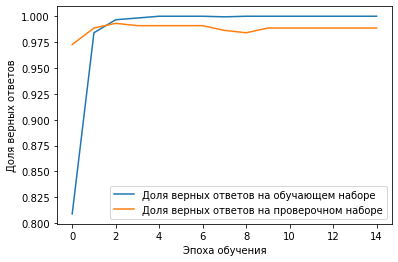

In [26]:
#Создаём полносвязную сеть
model01 = Sequential()
#Входной полносвязный слой
model01.add(Dense(64, input_dim=maxWordsCount,
                  activation='relu'))
#Слой регуляризации Dropout
model01.add(Dropout(0.4))
#Второй полносвязный слой
model01.add(Dense(64, activation='relu'))
#Слой регуляризации Dropout
model01.add(Dropout(0.4))
#Выходной полносвязный слой
model01.add(Dense(nClasses, activation='softmax'))


model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке
history = model01.fit(xTrain, 
                    yTrain, 
                    epochs=15,#20
                    batch_size=64,#128
                    validation_data=(xVal, yVal))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

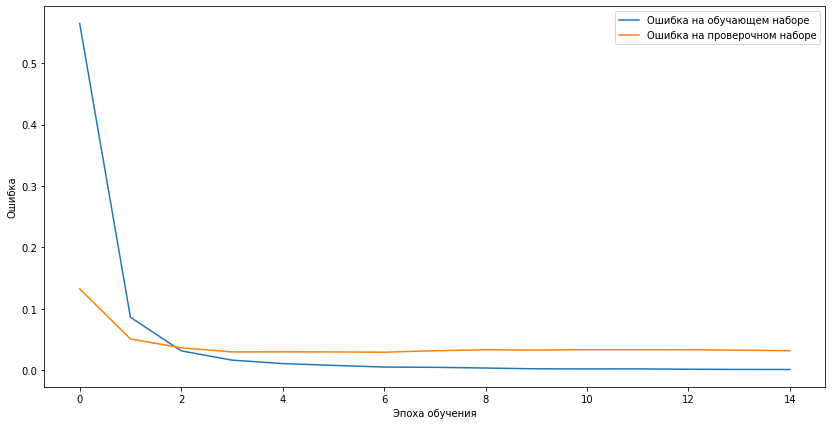

In [27]:
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [28]:
model01.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3200064   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 3,204,419
Trainable params: 3,204,419
Non-trainable params: 0
_________________________________________________________________


# Формирование прогноза

In [29]:
pred=pd.read_excel ("pred_kurs_analys_text.xlsx",header=None)
pred

,0
0,Двенадцатого мая в 15:42 при выполнении планов...
1,"""Горбатый"", ""железный Густав"", ""бетонный самол..."
2,Ледокол «Капитан Драницын» вернулся в порт при...


In [30]:
pred=pred[0].values

In [31]:
pred= [x_pred.lower() for x_pred in pred]

pred= [re.sub(r'\W+', ' ', x_pred) for x_pred in pred]

In [32]:
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      lower=True, split=' ', oov_token='unknown', char_level=False)

tokenizer.fit_on_texts(pred) 

xAll_pred = tokenizer.texts_to_matrix(pred)

print(xAll_pred.shape) 
print(xAll_pred[0, :20])

(3, 50000)
[0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]


In [33]:
currPred = model01.predict(xAll_pred)
#Определяем номер распознанного класса для каждого блока слов 
currOut = np.argmax(currPred, axis=1)

1/1 [==============================] - 0s 65ms/step


In [34]:
currOut

array([0, 0, 1], dtype=int64)

In [35]:
encoder.inverse_transform(currOut)

array(['авиа транспорт', 'авиа транспорт', 'водный транспорт'],
      dtype='<U16')